In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import hicstraw
np.set_printoptions(suppress=True)

In [2]:
cell_line = 'GM12878'
resolution = "100Kb"
resolution_num = 100000
figsize = 100
input_path = f"/media/jordan990301/Samsung_T5/HiC_Datasets/juicer_outputs/{cell_line}/{resolution}"
hic_path = f"/media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic"

In [3]:
# chrom_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']
chrom_list = ['1']
chrom_name = "1"

In [4]:
# hic = hicstraw.HiCFile(hic_path)
# print(hic.getGenomeID())
# print(hic.getResolutions())

In [5]:
# selected_chromosome_size = None

# for chrom in hic.getChromosomes():
#     print(chrom.name, chrom.length)
#     if (chrom.name == chrom_name):
#         selected_chromosome_size = int(chrom.length)

# print(f"\n{selected_chromosome_size}")

In [6]:
# matrix_oe = hic.getMatrixZoomData(chrom_name, chrom_name, "oe", "KR", "BP", resolution_num)
# matrix_oe_np = matrix_oe.getRecordsAsMatrix(0, selected_chromosome_size, 0, selected_chromosome_size)

# matrix_oe_df = pd.DataFrame(matrix_oe_np)
# matrix_oe_df = matrix_oe_df.dropna(axis=0, how="all").reset_index(drop=True)
# matrix_oe_df = matrix_oe_df.dropna(axis=1, how="all")
# matrix_oe_np = matrix_oe_df.values # Turn into numpy format

In [7]:
for chrom in chrom_list:
    # Read in the Pearson correlatin matrix
    pearson_df = pd.read_table(f"{input_path}/pearson_chr{chrom}.txt", header=None, sep=" ")
    pearson_df.pop(pearson_df.columns[-1])
    pearson_df = pearson_df.dropna(axis=0, how="all").reset_index(drop=True)
    pearson_df = pearson_df.dropna(axis=1, how="all")
    pearson_np = pearson_df.values # Turn into numpy format

    pearson_withoutZeroMean_np = pearson_np
    pearson_np = pearson_np - pearson_np.mean(axis=1, keepdims=True) # Zero mean of Pearson correlaton matrix

    # Read in the Eigenvector 1
    EV1_df = pd.read_table(f"{input_path}/pc1_chr{chrom}.txt", header=None, sep=" ")
    EV1_df = EV1_df.dropna(axis=0, how="all").reset_index(drop=True)
    EV1_np = EV1_df.values # Turn into numpy format
    EV1_np = EV1_np.flatten() # Turn into 1D vector

    if len(pearson_np) == len(EV1_np) and len(pearson_np) == len(pearson_np[0]):
        # According the steps in SVD, set x as pearson_df, and set y as x' / np.sqrt(n)
        n = len(pearson_np)
        pearson_T_np = np.transpose(pearson_np)
        y_np = pearson_T_np / np.sqrt(n)
        cov_np = np.matmul(np.transpose(y_np), y_np) # Covariance matrix of pearson_df


In [8]:
print(len(pearson_np))
print(len(pearson_np[0]))

2276
2276


In [9]:
print(np.mean(pearson_withoutZeroMean_np[0]))
print(np.mean(pearson_np[0]))

0.025029272980112916
1.155100229486982e-16


Text(0.5, 1.0, 'Origin Pearson 100Kb')

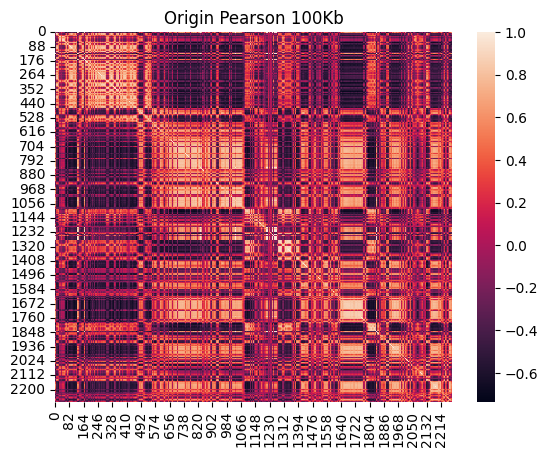

In [10]:
# display(pearson_withoutZeroMean_np[0])
ax = plt.axes()
sns.heatmap(pearson_withoutZeroMean_np, ax=ax)
ax.set_title(f'Origin Pearson {resolution}')

Text(0.5, 1.0, 'Zero means Pearson 100Kb')

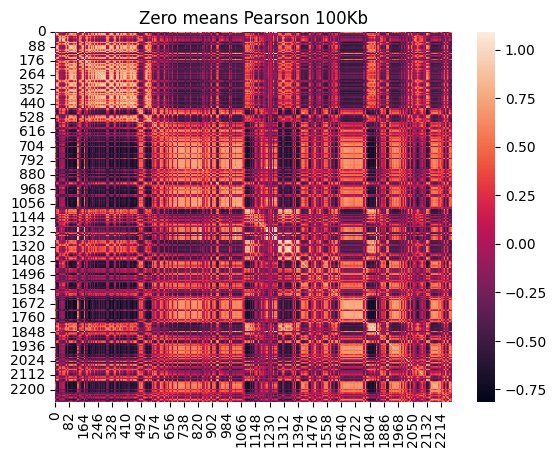

In [11]:
# display(pearson_np[0])
ax = plt.axes()
sns.heatmap(pearson_np, ax=ax)
ax.set_title(f'Zero means Pearson {resolution}')

Text(0.5, 1.0, 'Covariance matrix of origin Pearson 100Kb')

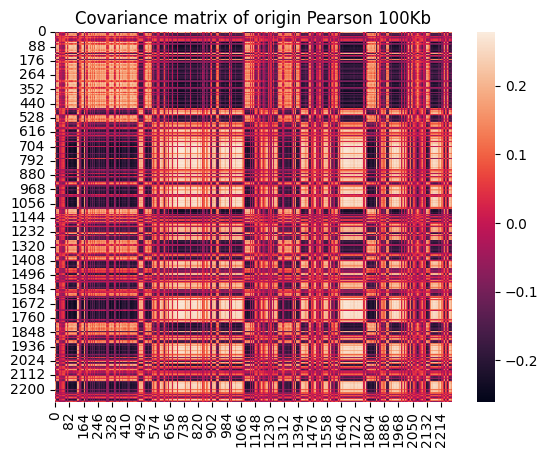

In [14]:
ax = plt.axes()
sns.heatmap(np.cov(pearson_withoutZeroMean_np), ax=ax)
ax.set_title(f'Covariance matrix of origin Pearson {resolution}')

Text(0.5, 1.0, 'Covariance matrix of Zero means Pearson 100Kb')

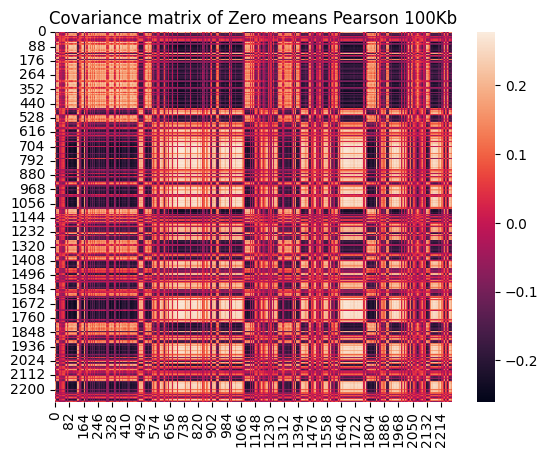

In [13]:
# display(cov_np)
ax = plt.axes()
sns.heatmap(cov_np, ax=ax)
ax.set_title(f'Covariance matrix of Zero means Pearson {resolution}')